In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import gridspec


In [24]:
data=pd.read_csv("/content/creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [25]:
print(data.shape)
print(data.describe())

(122881, 31)
                Time             V1             V2             V3  \
count  122881.000000  122881.000000  122881.000000  122881.000000   
mean    47960.696788      -0.253250      -0.005554       0.677405   
std     19271.900236       1.834020       1.633205       1.288146   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     36052.000000      -1.021720      -0.581971       0.173661   
50%     49837.000000      -0.264411       0.091708       0.752260   
75%     63807.000000       1.155820       0.758901       1.372370   
max     76723.000000       1.960497      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  122881.000000  122881.000000  122881.000000  122881.000000   
mean        0.152665      -0.282974       0.087168      -0.114256   
std         1.334018       1.327517       1.291374       1.186551   
min        -5.172595     -42.147898     -26.160506     -31.764946   
25%        -0.706443

In [26]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0020386528581913073
Fraud Cases: 250
Valid Transactions: 122630


In [27]:
print("Amount details of fraud transactions:")
fraud.Amount.describe()

Amount details of fraud transactions:


,Amount
count,250.000000
mean,119.582960
std,250.736534
min,0.000000
25%,1.000000
50%,11.850000
75%,99.990000
max,1809.680000


In [28]:
print("Amount details of Valid transactions")
valid.Amount.describe()

Amount details of Valid transactions


,Amount
count,122630.000000
mean,93.906805
std,255.091868
min,0.000000
25%,6.830000
50%,24.990000
75%,84.150000
max,19656.530000


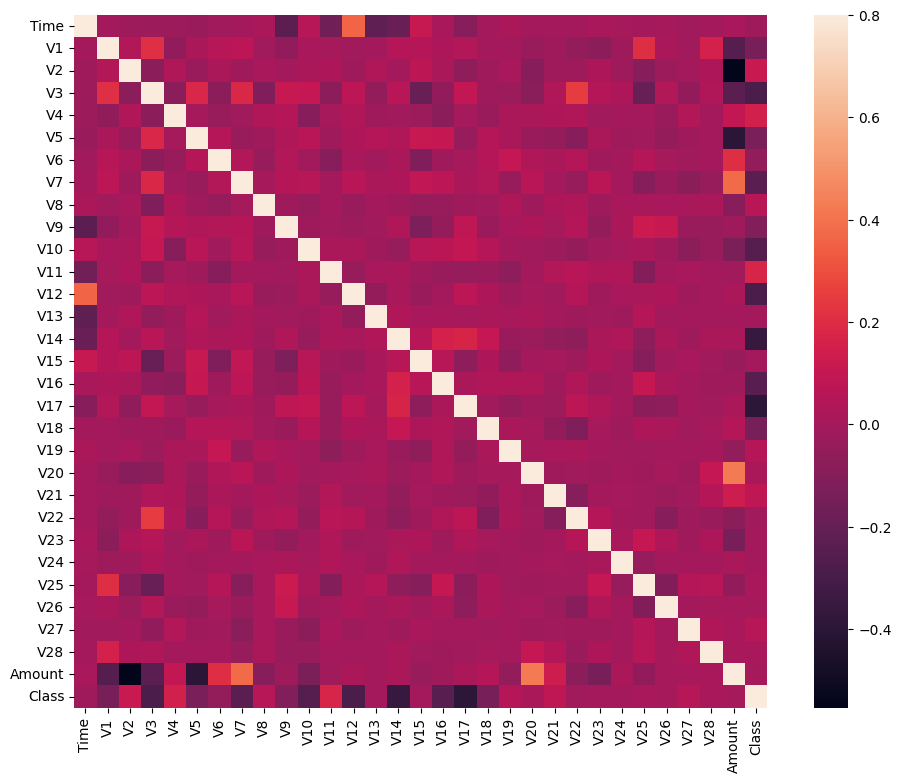

In [29]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [30]:
x=data.drop(['Class'],axis=1)
y=data['Class']
print(x.shape)
print(y.shape)
xdata=x.values
ydata=y.values

(122881, 30)
(122881,)


In [46]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(
    xdata,ydata,test_size=0.2,random_state=42)

In [71]:

import numpy as np
print(pd.isnull(yTrain).sum())

1


In [73]:
import numpy as np

# Assuming xTrain and yTrain are NumPy arrays
print(f"Length of xTrain: {len(xTrain)}")
print(f"Length of yTrain: {len(yTrain)}")

# Align lengths
min_length = min(len(xTrain), len(yTrain))
xTrain = xTrain[:min_length]
yTrain = yTrain[:min_length]

# Handle NaN values in yTrain
valid_indices = ~np.isnan(yTrain)
xTrain = xTrain[valid_indices]
yTrain = yTrain[valid_indices]

# Validate alignment
print(f"New Length of xTrain: {len(xTrain)}")
print(f"New Length of yTrain: {len(yTrain)}")


Length of xTrain: 98301
Length of yTrain: 98302
New Length of xTrain: 98300
New Length of yTrain: 98300


In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred=rfc.predict(xTest)

In [78]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score ,matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors=(yPred != yTest).sum()
print("The model used is Random Forest Classifier")

acc=accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))

prec=precision_score(yTest,yPred)
print("The pression is {}".format(prec))

f1=f1_score(yTest,yPred)
print("The f1 score is {} ".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest Classifier
The accuracy is 0.9978028237783293
The pression is 1.0
The f1 score is 0.12903225806451613
The Matthews correlation coefficient is0.2623241566855461


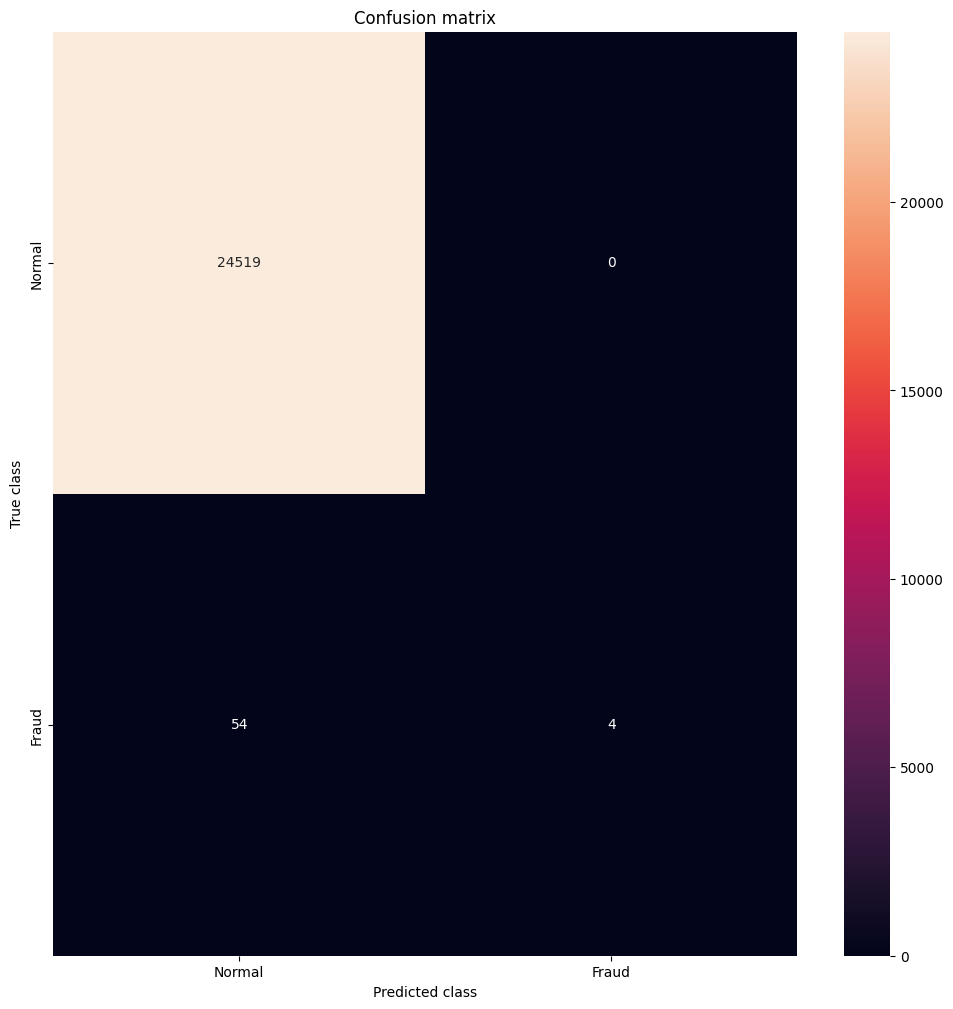

In [80]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
